<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_HubbleTensionResolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

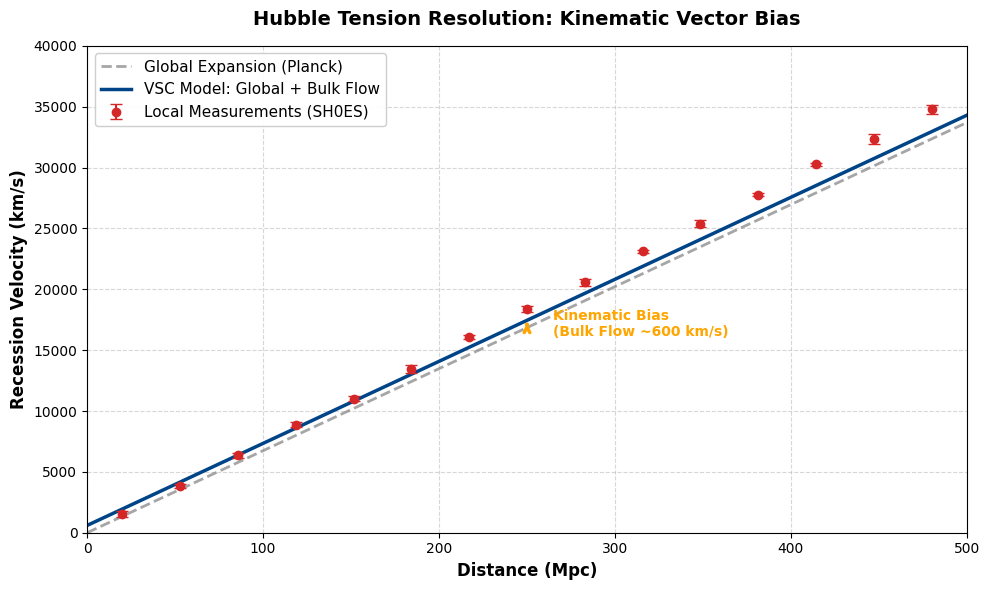

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Simulation Parameters ---
d = np.linspace(0, 500, 100)
H0_Planck = 67.4
H0_SH0ES = 73.0
v_bulk_flow = 600

# --- 2. Generate Theoretical Models ---
v_planck = H0_Planck * d
v_shoes_theoretical = H0_SH0ES * d
v_vsc = (H0_Planck * d) + v_bulk_flow

# --- 3. Generate Synthetic Data ---
np.random.seed(42)
d_data = np.linspace(20, 480, 15)
noise = np.random.normal(0, 150, len(d_data))
v_data = (H0_SH0ES * d_data) + noise
y_err = np.random.uniform(100, 400, len(d_data))

# --- 4. Plotting ---
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

# Plot 1: Global Background
ax.plot(d, v_planck, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='Global Expansion (Planck)')

# Plot 2: VSC Model
ax.plot(d, v_vsc, color='#004488', linewidth=2.5, label='VSC Model: Global + Bulk Flow')

# Plot 3: Local Data (Fixed the multi-line syntax here)
ax.errorbar(d_data, v_data, yerr=y_err, fmt='o', color='#d62728', ecolor='#d62728', elinewidth=1.5, capsize=4, markersize=6, label='Local Measurements (SH0ES)')

# --- 5. Annotations ---
mid_dist = 250
v_p_mid = H0_Planck * mid_dist
v_v_mid = (H0_Planck * mid_dist) + v_bulk_flow

ax.annotate('', xy=(mid_dist, v_v_mid), xytext=(mid_dist, v_p_mid), arrowprops=dict(arrowstyle="->", color='orange', lw=2.5))
ax.text(mid_dist + 15, (v_p_mid + v_v_mid)/2, 'Kinematic Bias\n(Bulk Flow ~600 km/s)', color='orange', fontsize=10, fontweight='bold', va='center')

# Labels
ax.set_title('Hubble Tension Resolution: Kinematic Vector Bias', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Distance (Mpc)', fontsize=12, fontweight='bold')
ax.set_ylabel('Recession Velocity (km/s)', fontsize=12, fontweight='bold')
ax.set_xlim(0, 500)
ax.set_ylim(0, 40000)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(fontsize=11, loc='upper left', frameon=True, framealpha=0.95)

plt.tight_layout()
plt.show()